In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers, optimizers
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Dense,Dropout, BatchNormalization, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam,SGD, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pick
import matplotlib.pyplot as plt
import time

In [ ]:
path_name ="/content/drive/MyDrive/cifar-10-batches-py/data_batch_1"
with open(path_name, mode="rb") as file:
    batch = pickle.load(file,encoding="latin1")
features = batch["data"].reshape((len(batch["data"]),3,32,32)).transpose(0,2,3,1)
labels = batch["labels"]

In [ ]:
path_name_2 ="/content/drive/MyDrive/cifar-10-batches-py/data_batch_2"
with open(path_name_2, mode="rb") as file:
    batch_2 = pickle.load(file,encoding="latin1")
features_2 = batch_2["data"].reshape((len(batch_2["data"]),3,32,32)).transpose(0,2,3,1)
labels_2 = batch_2["labels"]

In [ ]:
print(len(labels))
print(features.shape)
features_test = np.concatenate((features,features_2))
labels_test = labels + labels_2
print(len(labels_test))
print(features_test.shape)

10000
(10000, 32, 32, 3)
20000
(20000, 32, 32, 3)


In [ ]:
nb_image = features_test.shape[0]
print(nb_image)
x_train_tmp = np.array([], dtype = "uint8")
y_train_tmp = np.array([], dtype = "int64")
for index in range(0, nb_image):
    if labels_test[index] == 3 or labels_test[index] == 5:
        t = features_test[index]
        x_train_tmp = np.concatenate((x_train_tmp, t.reshape(-1)))
        if labels_test[index] == 3:
            y_train_tmp = np.concatenate([y_train_tmp,[0]])
        elif labels_test[index] == 5:
            y_train_tmp = np.concatenate([y_train_tmp,[1]])

20000


In [ ]:
print(x_train_tmp.shape)
x_train_tmp = x_train_tmp.reshape(-1,32,32,3)
print(x_train_tmp.shape)
print(x_train_tmp)

(12091392,)
(3936, 32, 32, 3)
[[[[125 125 116]
   [110 101  91]
   [102  90  83]
   ...
   [202 207 214]
   [200 205 212]
   [202 208 214]]

  [[142 146 142]
   [146 144 139]
   [176 172 170]
   ...
   [195 201 205]
   [198 205 209]
   [204 211 215]]

  [[180 185 183]
   [143 146 146]
   [156 157 157]
   ...
   [122 111 113]
   [139 128 131]
   [158 147 150]]

  ...

  [[104  82  41]
   [101  80  39]
   [101  81  38]
   ...
   [126 103  67]
   [126 103  69]
   [125 101  68]]

  [[104  81  40]
   [105  84  41]
   [109  88  43]
   ...
   [138 113  78]
   [137 113  80]
   [137 112  81]]

  [[105  83  42]
   [108  87  45]
   [115  94  50]
   ...
   [143 117  82]
   [143 116  84]
   [144 116  86]]]


 [[[110 104  97]
   [142 135 118]
   [151 146 120]
   ...
   [ 39  39  39]
   [ 40  40  40]
   [ 38  38  38]]

  [[109 103  95]
   [141 133 115]
   [152 147 119]
   ...
   [ 36  36  37]
   [ 40  40  40]
   [ 36  36  36]]

  [[105  98  90]
   [142 133 114]
   [151 145 117]
   ...
   [ 39  39  41

In [ ]:
nb_cat_dog = y_train_tmp.shape[0]
decoupe = (int)(4*(nb_cat_dog/5))
print(nb_cat_dog)
print(decoupe)
x_train = x_train_tmp[:decoupe]
x_test = x_train_tmp[decoupe:]
y_train = y_train_tmp[:decoupe]
y_test = y_train_tmp[decoupe:]

3936
3148


In [ ]:
n_values = np.max(y_train+1)
print(n_values)
y_train = np.eye(n_values)[y_train]
y_test = np.eye(n_values)[y_test]


2


[0. 1.]


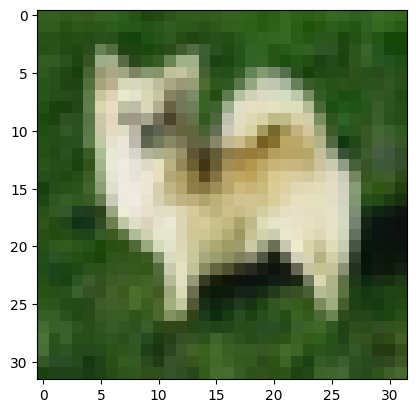

In [ ]:
im = x_train[210]
#print(im)
plt.imshow(im)
print(y_train[210])

In [ ]:
dp = 0.20
model=Sequential()
model.add(Conv2D(32,(3,3),activation = "relu", kernel_initializer="random_uniform",padding="same", input_shape=(32,32,3)))
model.add(MaxPooling2D((2,2)))
model.add(BatchNormalization())
model.add(Dropout(dp))
model.add(Conv2D(64,(3,3),activation = "relu", kernel_initializer="random_uniform",padding="same", input_shape=(32,32,3)))
model.add(MaxPooling2D((2,2)))
model.add(BatchNormalization())
model.add(Dropout(dp))
model.add(Conv2D(128,(3,3),activation = "relu", kernel_initializer="random_uniform",padding="same", input_shape=(32,32,3)))
model.add(MaxPooling2D((2,2)))
model.add(BatchNormalization())
model.add(Dropout(dp))
model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dense(2, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 16, 16, 32)        128       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 64)          0

In [ ]:
datagen = ImageDataGenerator(width_shift_range=0.1,height_shift_range=0.1, horizontal_flip = True)
train_datagen = datagen.flow(x_train,y_train, batch_size = 64)
start_time = time.time()
optimizer = SGD(learning_rate = 0.0001, momentum = 0.95)
model.compile(optimizer = optimizer, loss="categorical_crossentropy", metrics=["accuracy"])
history = model.fit_generator(train_datagen, epochs=200, steps_per_epoch= 50, validation_data = (x_test,y_test), verbose= 2)
duration = time.time() - start_time
print(duration)
print(history.history.keys())

Epoch 1/200


<ipython-input-15-b25556c3f1e1>:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_datagen, epochs=200, steps_per_epoch= 50, validation_data = (x_test,y_test), verbose= 2)


50/50 - 14s - loss: 0.8840 - accuracy: 0.5407 - val_loss: 0.7584 - val_accuracy: 0.5089 - 14s/epoch - 279ms/step
Epoch 2/200
50/50 - 2s - loss: 0.8397 - accuracy: 0.5588 - val_loss: 0.7316 - val_accuracy: 0.5254 - 2s/epoch - 33ms/step
Epoch 3/200
50/50 - 2s - loss: 0.8012 - accuracy: 0.5588 - val_loss: 0.6765 - val_accuracy: 0.5863 - 2s/epoch - 34ms/step
Epoch 4/200
50/50 - 2s - loss: 0.7800 - accuracy: 0.5756 - val_loss: 0.6676 - val_accuracy: 0.6053 - 2s/epoch - 35ms/step
Epoch 5/200
50/50 - 3s - loss: 0.7556 - accuracy: 0.5855 - val_loss: 0.6516 - val_accuracy: 0.6218 - 3s/epoch - 54ms/step
Epoch 6/200
50/50 - 2s - loss: 0.7596 - accuracy: 0.5778 - val_loss: 0.6523 - val_accuracy: 0.6244 - 2s/epoch - 48ms/step
Epoch 7/200
50/50 - 2s - loss: 0.7448 - accuracy: 0.5864 - val_loss: 0.6342 - val_accuracy: 0.6383 - 2s/epoch - 33ms/step
Epoch 8/200
50/50 - 2s - loss: 0.7364 - accuracy: 0.5972 - val_loss: 0.6501 - val_accuracy: 0.6523 - 2s/epoch - 35ms/step
Epoch 9/200
50/50 - 2s - loss: 0.

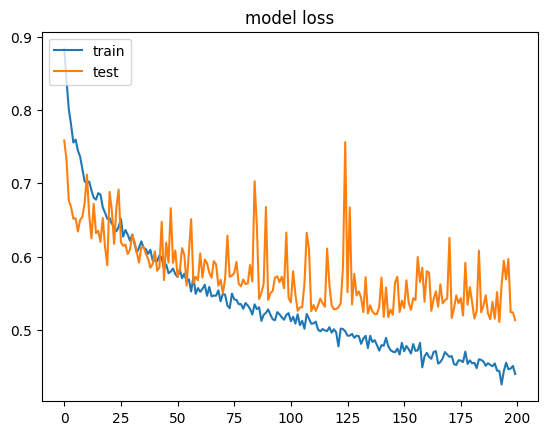

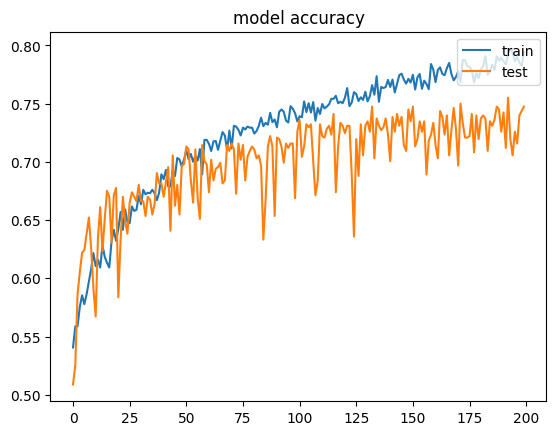

25/25 [==============================] - 0s 4ms/step - loss: 0.5131 - accuracy: 0.7475
0.5131473541259766 0.7474619150161743


In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(["train", "test"], loc="upper left")
plt.title("model loss")
plt.show()
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.legend(["train", "test"], loc="upper right")
plt.title("model accuracy")
plt.show()
loss, accuracy = model.evaluate(x_test,y_test)
print(loss,accuracy)

In [ ]:
dp = 0.20
model=Sequential()
model.add(Conv2D(32,(3,3),activation = "relu", kernel_initializer="random_uniform",padding="same", input_shape=(32,32,3)))
model.add(Conv2D(32,(3,3),activation = "relu", kernel_initializer="random_uniform",padding="same", input_shape=(32,32,3)))
model.add(MaxPooling2D((2,2)))
model.add(BatchNormalization())
model.add(Dropout(dp))
model.add(Conv2D(64,(3,3),activation = "relu", kernel_initializer="random_uniform",padding="same", input_shape=(32,32,3)))
model.add(Conv2D(64,(3,3),activation = "relu", kernel_initializer="random_uniform",padding="same", input_shape=(32,32,3)))
model.add(MaxPooling2D((2,2)))
model.add(BatchNormalization())
model.add(Dropout(dp))
model.add(Conv2D(128,(3,3),activation = "relu", kernel_initializer="random_uniform",padding="same", input_shape=(32,32,3)))
model.add(Conv2D(128,(3,3),activation = "relu", kernel_initializer="random_uniform",padding="same", input_shape=(32,32,3)))
model.add(MaxPooling2D((2,2)))
model.add(BatchNormalization())
model.add(Dropout(dp))
model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dense(2, activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 batch_normalization_3 (Bat  (None, 16, 16, 32)        128       
 chNormalization)                                                
                                                                 
 dropout_3 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 64)       

In [ ]:
datagen = ImageDataGenerator(width_shift_range=0.1,height_shift_range=0.1, horizontal_flip = True)
train_datagen = datagen.flow(x_train,y_train, batch_size = 64)
start_time = time.time()
optimizer = optimizers.RMSprop(learning_rate=0.0001)
model.compile(optimizer = optimizer, loss="categorical_crossentropy", metrics=["accuracy"])
history = model.fit_generator(train_datagen, epochs=200, steps_per_epoch= 50, validation_data = (x_test,y_test), verbose= 2)
duration = time.time() - start_time
print(duration)
print(history.history.keys())

Epoch 1/200


<ipython-input-18-92ba2ee70c72>:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_datagen, epochs=200, steps_per_epoch= 50, validation_data = (x_test,y_test), verbose= 2)


50/50 - 6s - loss: 0.8514 - accuracy: 0.5556 - val_loss: 0.6839 - val_accuracy: 0.5698 - 6s/epoch - 123ms/step
Epoch 2/200
50/50 - 2s - loss: 0.7795 - accuracy: 0.5772 - val_loss: 0.7165 - val_accuracy: 0.5089 - 2s/epoch - 38ms/step
Epoch 3/200
50/50 - 3s - loss: 0.7320 - accuracy: 0.5963 - val_loss: 0.8126 - val_accuracy: 0.5076 - 3s/epoch - 65ms/step
Epoch 4/200
50/50 - 2s - loss: 0.7188 - accuracy: 0.6090 - val_loss: 0.8825 - val_accuracy: 0.5076 - 2s/epoch - 39ms/step
Epoch 5/200
50/50 - 2s - loss: 0.6908 - accuracy: 0.6121 - val_loss: 1.0273 - val_accuracy: 0.5089 - 2s/epoch - 37ms/step
Epoch 6/200
50/50 - 2s - loss: 0.6838 - accuracy: 0.6150 - val_loss: 0.9114 - val_accuracy: 0.5102 - 2s/epoch - 39ms/step
Epoch 7/200
50/50 - 2s - loss: 0.6730 - accuracy: 0.6267 - val_loss: 0.8248 - val_accuracy: 0.5279 - 2s/epoch - 44ms/step
Epoch 8/200
50/50 - 3s - loss: 0.6632 - accuracy: 0.6267 - val_loss: 0.7008 - val_accuracy: 0.5723 - 3s/epoch - 65ms/step
Epoch 9/200
50/50 - 2s - loss: 0.65

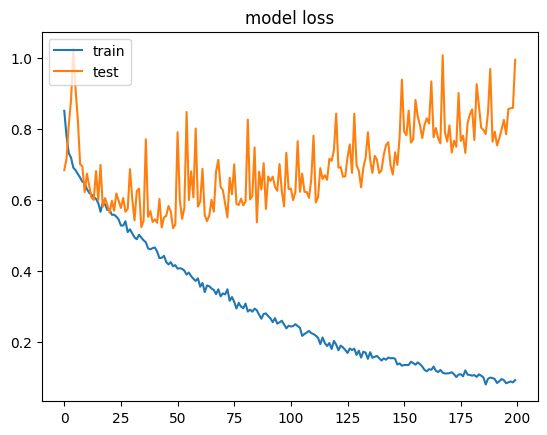

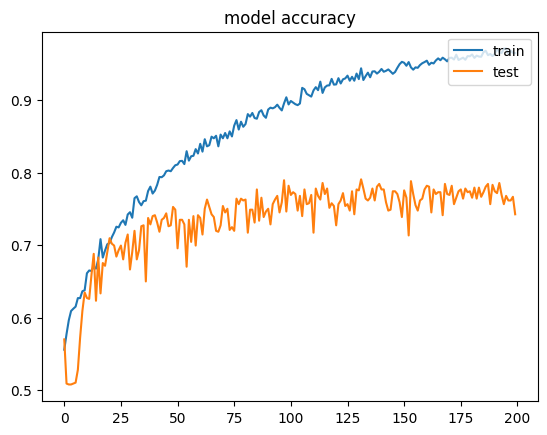

25/25 [==============================] - 0s 5ms/step - loss: 0.9953 - accuracy: 0.7424
0.9953016638755798 0.7423858046531677


In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(["train", "test"], loc="upper left")
plt.title("model loss")
plt.show()
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.legend(["train", "test"], loc="upper right")
plt.title("model accuracy")
plt.show()
loss, accuracy = model.evaluate(x_test,y_test)
print(loss,accuracy)

In [ ]:
dp = 0.20
model=Sequential()
model.add(Conv2D(32,(3,3),activation = "relu", kernel_initializer="random_uniform",padding="same", input_shape=(32,32,3)))
model.add(Conv2D(32,(3,3),activation = "relu", kernel_initializer="random_uniform",padding="same", input_shape=(32,32,3)))
model.add(MaxPooling2D((2,2)))
model.add(BatchNormalization())
model.add(Dropout(dp))
model.add(Conv2D(64,(3,3),activation = "relu", kernel_initializer="random_uniform",padding="same", input_shape=(32,32,3)))
model.add(Conv2D(64,(3,3),activation = "relu", kernel_initializer="random_uniform",padding="same", input_shape=(32,32,3)))
model.add(MaxPooling2D((2,2)))
model.add(BatchNormalization())
model.add(Dropout(dp))
model.add(Conv2D(128,(3,3),activation = "relu", kernel_initializer="random_uniform",padding="same", input_shape=(32,32,3)))
model.add(Conv2D(128,(3,3),activation = "relu", kernel_initializer="random_uniform",padding="same", input_shape=(32,32,3)))
model.add(Conv2D(128,(3,3),activation = "relu", kernel_initializer="random_uniform",padding="same", input_shape=(32,32,3)))
model.add(MaxPooling2D((2,2)))
model.add(BatchNormalization())
model.add(Dropout(dp))
model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dense(2, activation="softmax"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_10 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 batch_normalization_6 (Bat  (None, 16, 16, 32)        128       
 chNormalization)                                                
                                                                 
 dropout_6 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 16, 16, 64)       

In [ ]:
datagen = ImageDataGenerator(width_shift_range=0.1,height_shift_range=0.1, horizontal_flip = True)
train_datagen = datagen.flow(x_train,y_train, batch_size = 64)
start_time = time.time()
optimizer = optimizers.RMSprop(learning_rate=0.0001)
model.compile(optimizer = optimizer, loss="categorical_crossentropy", metrics=["accuracy"])
history = model.fit_generator(train_datagen, epochs=200, steps_per_epoch= 50, validation_data = (x_test,y_test), verbose= 2)
duration = time.time() - start_time
print(duration)
print(history.history.keys())

Epoch 1/200


<ipython-input-21-92ba2ee70c72>:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_datagen, epochs=200, steps_per_epoch= 50, validation_data = (x_test,y_test), verbose= 2)


50/50 - 6s - loss: 0.8055 - accuracy: 0.5483 - val_loss: 0.6906 - val_accuracy: 0.5241 - 6s/epoch - 112ms/step
Epoch 2/200
50/50 - 2s - loss: 0.7243 - accuracy: 0.5928 - val_loss: 0.6822 - val_accuracy: 0.5355 - 2s/epoch - 40ms/step
Epoch 3/200
50/50 - 3s - loss: 0.7014 - accuracy: 0.5991 - val_loss: 0.6675 - val_accuracy: 0.5622 - 3s/epoch - 62ms/step
Epoch 4/200
50/50 - 2s - loss: 0.6787 - accuracy: 0.6112 - val_loss: 0.6630 - val_accuracy: 0.5723 - 2s/epoch - 38ms/step
Epoch 5/200
50/50 - 2s - loss: 0.6687 - accuracy: 0.6229 - val_loss: 0.6367 - val_accuracy: 0.6472 - 2s/epoch - 37ms/step
Epoch 6/200
50/50 - 2s - loss: 0.6569 - accuracy: 0.6404 - val_loss: 0.6291 - val_accuracy: 0.6574 - 2s/epoch - 37ms/step
Epoch 7/200
50/50 - 2s - loss: 0.6533 - accuracy: 0.6306 - val_loss: 0.6103 - val_accuracy: 0.6789 - 2s/epoch - 37ms/step
Epoch 8/200
50/50 - 2s - loss: 0.6287 - accuracy: 0.6531 - val_loss: 0.6211 - val_accuracy: 0.6396 - 2s/epoch - 38ms/step
Epoch 9/200
50/50 - 3s - loss: 0.63

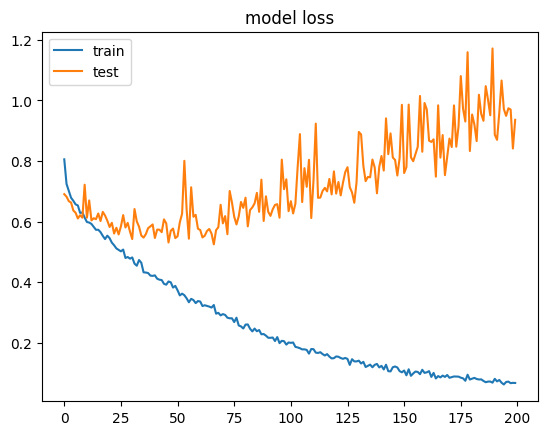

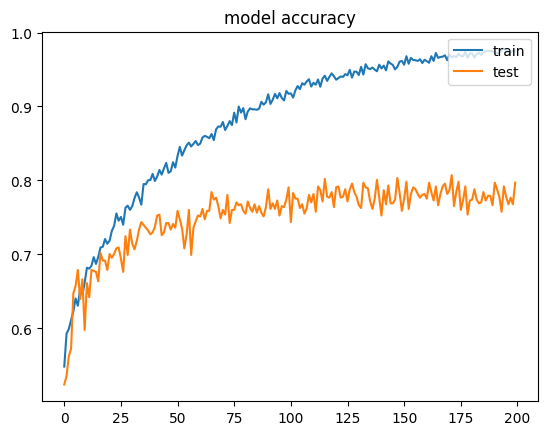

25/25 [==============================] - 0s 5ms/step - loss: 0.9361 - accuracy: 0.7970
0.9361305832862854 0.796954333782196


In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(["train", "test"], loc="upper left")
plt.title("model loss")
plt.show()
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.legend(["train", "test"], loc="upper right")
plt.title("model accuracy")
plt.show()
loss, accuracy = model.evaluate(x_test,y_test)
print(loss,accuracy)

In [ ]:
dp = 0.20
model=Sequential()
model.add(Conv2D(32,(3,3),activation = "relu", kernel_initializer="random_uniform",padding="same", input_shape=(32,32,3)))
model.add(Conv2D(32,(3,3),activation = "relu", kernel_initializer="random_uniform",padding="same", input_shape=(32,32,3)))
model.add(MaxPooling2D((2,2)))
model.add(BatchNormalization())
model.add(Dropout(dp))
model.add(Conv2D(64,(3,3),activation = "relu", kernel_initializer="random_uniform",padding="same", input_shape=(32,32,3)))
model.add(Conv2D(64,(3,3),activation = "relu", kernel_initializer="random_uniform",padding="same", input_shape=(32,32,3)))
model.add(MaxPooling2D((2,2)))
model.add(BatchNormalization())
model.add(Dropout(dp))
model.add(Conv2D(128,(3,3),activation = "relu", kernel_initializer="random_uniform",padding="same", input_shape=(32,32,3)))
model.add(Conv2D(128,(3,3),activation = "relu", kernel_initializer="random_uniform",padding="same", input_shape=(32,32,3)))
model.add(Conv2D(128,(3,3),activation = "relu", kernel_initializer="random_uniform",padding="same", input_shape=(32,32,3)))
model.add(MaxPooling2D((2,2)))
model.add(BatchNormalization())
model.add(Dropout(dp))
model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dense(2, activation="softmax"))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_17 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 batch_normalization_9 (Bat  (None, 16, 16, 32)        128       
 chNormalization)                                                
                                                                 
 dropout_9 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_18 (Conv2D)          (None, 16, 16, 64)       

In [ ]:
datagen = ImageDataGenerator(width_shift_range=0.3,height_shift_range=0.3, horizontal_flip = True)
train_datagen = datagen.flow(x_train,y_train, batch_size = 64)
start_time = time.time()
optimizer = optimizers.RMSprop(learning_rate=0.0001)
model.compile(optimizer = optimizer, loss="categorical_crossentropy", metrics=["accuracy"])
history = model.fit_generator(train_datagen, epochs=200, steps_per_epoch= 50, validation_data = (x_test,y_test), verbose= 2)
duration = time.time() - start_time
print(duration)
print(history.history.keys())

Epoch 1/200


<ipython-input-24-36714ae25573>:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_datagen, epochs=200, steps_per_epoch= 50, validation_data = (x_test,y_test), verbose= 2)


50/50 - 5s - loss: 0.8503 - accuracy: 0.5334 - val_loss: 0.6898 - val_accuracy: 0.5279 - 5s/epoch - 109ms/step
Epoch 2/200
50/50 - 2s - loss: 0.7816 - accuracy: 0.5349 - val_loss: 0.6844 - val_accuracy: 0.5749 - 2s/epoch - 38ms/step
Epoch 3/200
50/50 - 2s - loss: 0.7515 - accuracy: 0.5505 - val_loss: 0.6855 - val_accuracy: 0.5584 - 2s/epoch - 50ms/step
Epoch 4/200
50/50 - 3s - loss: 0.7277 - accuracy: 0.5699 - val_loss: 0.6802 - val_accuracy: 0.5635 - 3s/epoch - 63ms/step
Epoch 5/200
50/50 - 2s - loss: 0.7254 - accuracy: 0.5581 - val_loss: 0.6728 - val_accuracy: 0.5876 - 2s/epoch - 39ms/step
Epoch 6/200
50/50 - 2s - loss: 0.7060 - accuracy: 0.5604 - val_loss: 0.6932 - val_accuracy: 0.5317 - 2s/epoch - 39ms/step
Epoch 7/200
50/50 - 2s - loss: 0.7015 - accuracy: 0.5632 - val_loss: 0.6759 - val_accuracy: 0.5825 - 2s/epoch - 40ms/step
Epoch 8/200
50/50 - 2s - loss: 0.6889 - accuracy: 0.5689 - val_loss: 0.6635 - val_accuracy: 0.5914 - 2s/epoch - 40ms/step
Epoch 9/200
50/50 - 3s - loss: 0.68

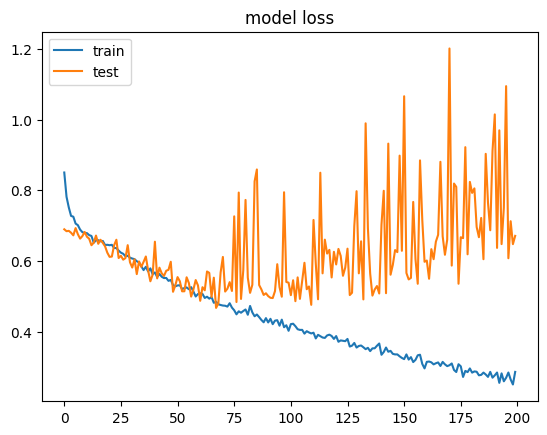

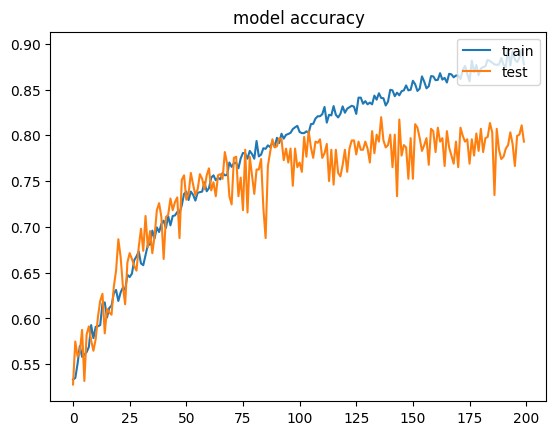

25/25 [==============================] - 0s 5ms/step - loss: 0.6713 - accuracy: 0.7931
0.6712977886199951 0.7931472063064575


In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(["train", "test"], loc="upper left")
plt.title("model loss")
plt.show()
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.legend(["train", "test"], loc="upper right")
plt.title("model accuracy")
plt.show()
loss, accuracy = model.evaluate(x_test,y_test)
print(loss,accuracy)

In [ ]:
dp = 0.30
model=Sequential()
model.add(Conv2D(32,(3,3),activation = "relu", kernel_initializer="random_uniform",padding="same", input_shape=(32,32,3)))
model.add(Conv2D(32,(3,3),activation = "relu", kernel_initializer="random_uniform",padding="same", input_shape=(32,32,3)))
model.add(MaxPooling2D((2,2)))
model.add(BatchNormalization())
model.add(Dropout(dp))
model.add(Conv2D(64,(3,3),activation = "relu", kernel_initializer="random_uniform",padding="same", input_shape=(32,32,3)))
model.add(Conv2D(64,(3,3),activation = "relu", kernel_initializer="random_uniform",padding="same", input_shape=(32,32,3)))
model.add(MaxPooling2D((2,2)))
model.add(BatchNormalization())
model.add(Dropout(dp))
model.add(Conv2D(128,(3,3),activation = "relu", kernel_initializer="random_uniform",padding="same", input_shape=(32,32,3)))
model.add(Conv2D(128,(3,3),activation = "relu", kernel_initializer="random_uniform",padding="same", input_shape=(32,32,3)))
model.add(Conv2D(128,(3,3),activation = "relu", kernel_initializer="random_uniform",padding="same", input_shape=(32,32,3)))
model.add(MaxPooling2D((2,2)))
model.add(BatchNormalization())
model.add(Dropout(dp))
model.add(Flatten())
model.add(Dense(256,activation="tanh"))
model.add(Dense(512, activation ="tanh"))
model.add(Dense(2, activation="softmax"))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_24 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                                 
 batch_normalization_12 (Ba  (None, 16, 16, 32)        128       
 tchNormalization)                                               
                                                                 
 dropout_12 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_25 (Conv2D)          (None, 16, 16, 64)       

In [ ]:
datagen = ImageDataGenerator(width_shift_range=0.5,height_shift_range=0.5, horizontal_flip = True)
train_datagen = datagen.flow(x_train,y_train, batch_size = 64)
start_time = time.time()
optimizer = optimizers.RMSprop(learning_rate=0.0001)
model.compile(optimizer = optimizer, loss="categorical_crossentropy", metrics=["accuracy"])
history = model.fit_generator(train_datagen, epochs=300, steps_per_epoch= 50, validation_data = (x_test,y_test), verbose= 2)
duration = time.time() - start_time
print(duration)
print(history.history.keys())

Epoch 1/300


<ipython-input-27-75fe0d79c362>:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_datagen, epochs=300, steps_per_epoch= 50, validation_data = (x_test,y_test), verbose= 2)


50/50 - 7s - loss: 0.7475 - accuracy: 0.5257 - val_loss: 0.6899 - val_accuracy: 0.5254 - 7s/epoch - 134ms/step
Epoch 2/300
50/50 - 2s - loss: 0.7280 - accuracy: 0.5172 - val_loss: 0.6909 - val_accuracy: 0.5292 - 2s/epoch - 37ms/step
Epoch 3/300
50/50 - 2s - loss: 0.7104 - accuracy: 0.5394 - val_loss: 0.6904 - val_accuracy: 0.5114 - 2s/epoch - 39ms/step
Epoch 4/300
50/50 - 2s - loss: 0.6975 - accuracy: 0.5451 - val_loss: 0.6911 - val_accuracy: 0.5102 - 2s/epoch - 49ms/step
Epoch 5/300
50/50 - 3s - loss: 0.7028 - accuracy: 0.5416 - val_loss: 0.6810 - val_accuracy: 0.5419 - 3s/epoch - 62ms/step
Epoch 6/300
50/50 - 2s - loss: 0.6954 - accuracy: 0.5543 - val_loss: 0.6773 - val_accuracy: 0.5584 - 2s/epoch - 38ms/step
Epoch 7/300
50/50 - 2s - loss: 0.6892 - accuracy: 0.5511 - val_loss: 0.6731 - val_accuracy: 0.5660 - 2s/epoch - 39ms/step
Epoch 8/300
50/50 - 2s - loss: 0.6949 - accuracy: 0.5457 - val_loss: 0.6712 - val_accuracy: 0.5673 - 2s/epoch - 38ms/step
Epoch 9/300
50/50 - 2s - loss: 0.69

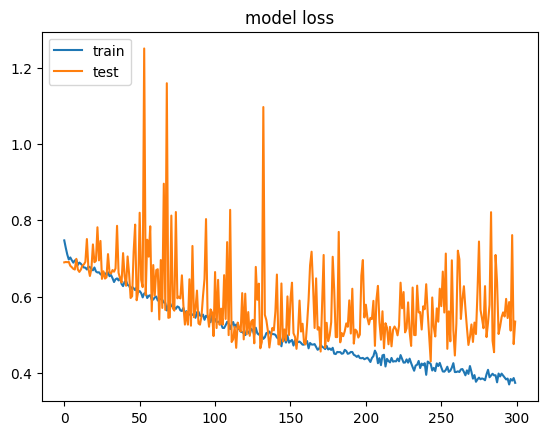

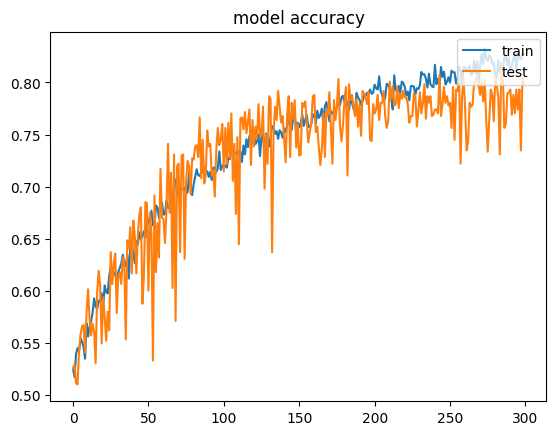

25/25 [==============================] - 0s 4ms/step - loss: 0.5348 - accuracy: 0.7982
0.5347734093666077 0.7982233762741089


In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(["train", "test"], loc="upper left")
plt.title("model loss")
plt.show()
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.legend(["train", "test"], loc="upper right")
plt.title("model accuracy")
plt.show()
loss, accuracy = model.evaluate(x_test,y_test)
print(loss,accuracy)

In [ ]:
dp = 0.3
model = Sequential()
model.add(Conv2D(32,(3,3), activation = "relu", padding = "same", input_shape = (32,32,3)))
model.add(Conv2D(32,(3,3), activation = "relu", padding = "same", input_shape = (32,32,3)))
model.add(MaxPooling2D((2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3), activation = "relu", padding = "same", input_shape = (32,32,3)))
model.add(Conv2D(64,(3,3), activation = "relu", padding = "same", input_shape = (32,32,3)))
model.add(MaxPooling2D((2,2)))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3), activation = "relu", padding = "same", input_shape = (32,32,3)))
model.add(Conv2D(128,(3,3), activation = "relu", padding = "same", input_shape = (32,32,3)))
model.add(MaxPooling2D((2,2)))
model.add(BatchNormalization())
model.add(Conv2D(256,(3,3), activation = "relu", padding = "same", input_shape = (32,32,3)))
model.add(Conv2D(256,(3,3), activation = "relu", padding = "same", input_shape = (32,32,3)))
model.add(Conv2D(256,(3,3), activation = "relu", padding = "same", input_shape = (32,32,3)))
model.add(MaxPooling2D((2,2)))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(dp))
model.add(Dense(64, activation = "relu"))
model.add(Dropout(dp))
model.add(Dense(2, activation ="softmax"))
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_53 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_54 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                                 
 batch_normalization_26 (Ba  (None, 16, 16, 32)        128       
 tchNormalization)                                               
                                                                 
 conv2d_55 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_56 (Conv2D)          (None, 16, 16, 64)       

In [ ]:
optimizers = SGD(learning_rate = 0.0001)
datagen = ImageDataGenerator(width_shift_range = 0.7, height_shift_range = 0.7, horizontal_flip = True, vertical_flip = True )
train_datagen = datagen.flow(x_train,y_train, batch_size = 64)
model.compile(optimizer = optimizers, loss = "categorical_crossentropy", metrics = ["accuracy"])
history = model.fit(train_datagen, epochs = 400, steps_per_epoch = 50, validation_data = (x_test, y_test), verbose = 2)

Epoch 1/400
50/50 - 6s - loss: 1.0267 - accuracy: 0.5070 - val_loss: 0.6912 - val_accuracy: 0.5165 - 6s/epoch - 115ms/step
Epoch 2/400
50/50 - 2s - loss: 0.9950 - accuracy: 0.4978 - val_loss: 0.6942 - val_accuracy: 0.5152 - 2s/epoch - 40ms/step
Epoch 3/400
50/50 - 2s - loss: 0.9690 - accuracy: 0.5060 - val_loss: 0.6972 - val_accuracy: 0.4962 - 2s/epoch - 46ms/step
Epoch 4/400
50/50 - 4s - loss: 0.9467 - accuracy: 0.4971 - val_loss: 0.7075 - val_accuracy: 0.4924 - 4s/epoch - 74ms/step
Epoch 5/400
50/50 - 3s - loss: 0.9404 - accuracy: 0.5029 - val_loss: 0.7115 - val_accuracy: 0.4911 - 3s/epoch - 51ms/step
Epoch 6/400
50/50 - 2s - loss: 0.9098 - accuracy: 0.5048 - val_loss: 0.7142 - val_accuracy: 0.4975 - 2s/epoch - 41ms/step
Epoch 7/400
50/50 - 2s - loss: 0.8898 - accuracy: 0.5200 - val_loss: 0.7210 - val_accuracy: 0.5165 - 2s/epoch - 41ms/step
Epoch 8/400
50/50 - 2s - loss: 0.9025 - accuracy: 0.5064 - val_loss: 0.7381 - val_accuracy: 0.5190 - 2s/epoch - 42ms/step
Epoch 9/400
50/50 - 3s 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


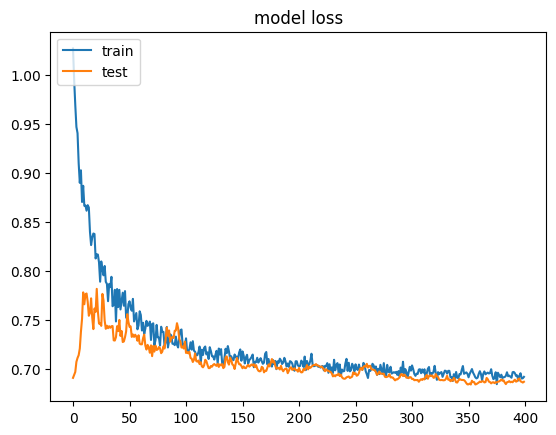

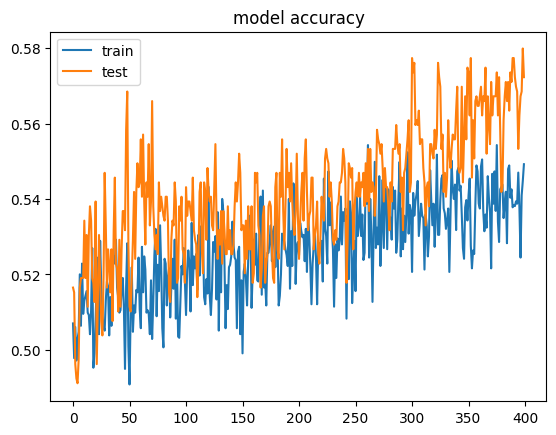

In [ ]:
print(history.history.keys())
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(["train", "test"], loc="upper left")
plt.title("model loss")
plt.show()

plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.legend(["train","test"], loc="upper left")
plt.title("model accuracy")
plt.show()